### 1. Importing the Libraries

In [13]:
import pandas as pd

### 2. Importing the Dataset

In [16]:
data = pd.read_csv('heart.csv')

### 3. Taking Care of Missing Values

In [19]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4. Taking Care of Duplicate Values

In [22]:
data_dup = data.duplicated().any()

In [24]:
data_dup

True

In [26]:
data = data.drop_duplicates()

In [28]:
data_dup = data.duplicated().any()

In [30]:
data_dup

False

### 5. Data Processing

In [33]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [35]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [37]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6. Encoding Categorical Data

In [42]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [44]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [46]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [48]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 7. Feature Scaling

In [52]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [56]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 8. Splitting The Dataset Into The Training Set And Test Set

In [61]:
X = data.drop('target',axis=1)

In [63]:
y = data['target']

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [69]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

### 9. Logistic Regression

In [72]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [74]:
from sklearn.linear_model import LogisticRegression

In [76]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [78]:
y_pred1 = log.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

### 10. SVC

In [85]:
from sklearn import svm

In [87]:
svm = svm.SVC()

In [89]:
svm.fit(X_train,y_train)

SVC()

In [91]:
y_pred2 = svm.predict(X_test)

In [93]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

### 11. KNeighbors Classifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier()

In [100]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [102]:
y_pred3=knn.predict(X_test)

In [104]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [106]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [107]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [108]:
import matplotlib.pyplot as plt

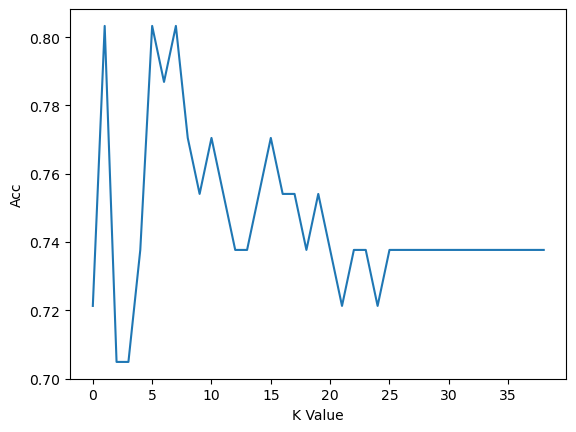

In [109]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [110]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

### Non-Linear ML Algorithms

In [129]:
data = pd.read_csv('heart.csv')

In [131]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [133]:
data = data.drop_duplicates()

In [179]:
data.shape

(302, 14)

In [181]:
X = data.drop('target',axis=1)
y=data['target']

In [183]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

### 12. Decision Tree Classifier

In [187]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
dt = DecisionTreeClassifier()

In [191]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [193]:
y_pred4= dt.predict(X_test)

In [195]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

### 13. Random Forest Classifier

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
rf = RandomForestClassifier()

In [202]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [204]:
y_pred5= rf.predict(X_test)

In [206]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

### 14. Gradient Boosting Classifier

In [209]:
from sklearn.ensemble import GradientBoostingClassifier

In [211]:
gbc = GradientBoostingClassifier()

In [213]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [215]:
y_pred6 = gbc.predict(X_test)

In [217]:
accuracy_score(y_test,y_pred6)

0.819672131147541

In [219]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})

In [221]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.868852
5,GB,0.819672


In [223]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

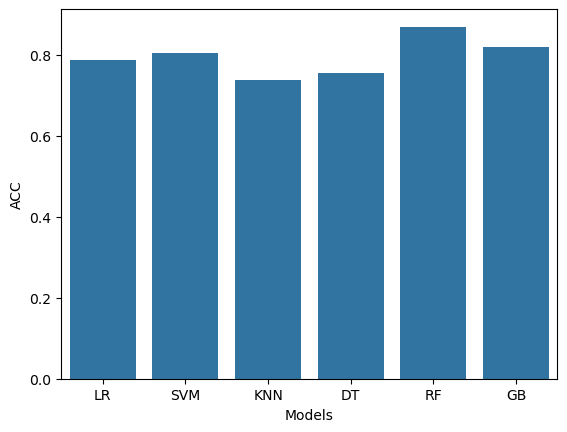

In [225]:
sns.barplot(x='Models',y='ACC',data=final_data)

In [227]:
X=data.drop('target',axis=1)
y=data['target']

In [229]:
from sklearn.ensemble import RandomForestClassifier

In [231]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### 15. Prediction on New Data

In [234]:
import pandas as pd

In [236]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [238]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [240]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


### 16. Save Model Using Joblib

In [243]:
import joblib

In [245]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [247]:
model = joblib.load('model_joblib_heart')

In [249]:
model.predict(new_data)

array([0], dtype=int64)

In [251]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### GUI

In [255]:
from tkinter import *
import joblib


In [4]:
pip install fpdf


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40713 sha256=52333e9fdce745395da1384a0958cdd3868bcaa55611c9d1f651d76a91afb553
  Stored in directory: c:\users\kavya kallanagoudar\appdata\local\pip\cache\wheels\6e\62\11\dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [12]:
pip install Pillow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
import os
from datetime import datetime
from fpdf import FPDF
from PIL import Image, ImageTk

def set_placeholder(entry, placeholder):
    entry.insert(0, placeholder)
    entry.config(fg='grey')
    
    def on_focus_in(event):
        if entry.get() == placeholder:
            entry.delete(0, "end")
            entry.config(fg='black')
    
    def on_focus_out(event):
        if entry.get() == "":
            entry.insert(0, placeholder)
            entry.config(fg='grey')
    
    entry.bind("<FocusIn>", on_focus_in)
    entry.bind("<FocusOut>", on_focus_out)

def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])
    
    if result == 0:
        result_text = "No Heart Disease"
    else:
        result_text = "Possibility of Heart Disease"
    
    result_label.config(text=result_text)
    return result_text

def generate_report():
    p1 = e1.get()
    p2 = e2.get()
    p3 = e3.get()
    p4 = e4.get()
    p5 = e5.get()
    p6 = e6.get()
    p7 = e7.get()
    p8 = e8.get()
    p9 = e9.get()
    p10 = e10.get()
    p11 = e11.get()
    p12 = e12.get()
    p13 = e13.get()
    
    diagnosis = show_entry_fields()
    
    report_content = (
        f"Heart Disease Prediction Report\n"
        f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n"
        f"Age: {p1}\n"
        f"Sex M(1),F(0): {p2}\n"
        f"Chest Pain: {p3}\n"
        f"Resting Blood Sugar: {p4}\n"
        f"Cholestrol: {p5}\n"
        f"Fasting Blood Sugar: {p6}\n"
        f"Rest ECG: {p7}\n"
        f"Thalach(Max heart rate achieved): {p8}\n"
        f"Exang(Exercise Induced Angina): {p9}\n"
        f"Oldpeak(Depression induced by exercise): {p10}\n"
        f"Slope of peak exercise: {p11}\n"
        f"Ca(Major vessels coloured by fluoroscopy): {p12}\n"
        f"Thal(Defect type): {p13}\n\n"
        f"Diagnosis: {diagnosis}\n"
    )
    
    downloads_folder = os.path.join(os.path.expanduser("~"), "Downloads")
    report_file = os.path.join(downloads_folder, "Heart_Disease_Prediction_Report.pdf")
    
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=18)
    for line in report_content.split("\n"):
        pdf.cell(200, 10, txt=line, ln=True, align='L')
    
    pdf.output(report_file)
    
    report_label.config(text=f"Report saved to {report_file}")

if __name__ == "__main__":
    master = Tk()
    master.title("Heart Disease Prediction System")
    master.geometry("600x600")

    # Load the background image
    bg_image = Image.open("istockphoto-1181922192-612x612.jpg")
    bg_image = bg_image.resize((600, 600), Image.BILINEAR)  # Resize without ANTIALIAS
    bg_photo = ImageTk.PhotoImage(bg_image)

    canvas = Canvas(master, width=800, height=800)
    canvas.pack(fill='both', expand=True)

    # Set the background image
    canvas.create_image(0, 0, image=bg_photo, anchor='nw')

    # Add a title label
    label = Label(master, text="Heart Disease Prediction System", font=('Helvetica', 18, 'bold'))
    label_window = canvas.create_window(300, 25, window=label)

    labels = [
        "Enter Your Age",
        "Male Or Female",
        "Chest Pain",
        "Resting Blood Sugar",
        "Cholestrol",
        "Fasting Blood Sugar",
        "Resting ECG",
        "Thalach(Max heart rate achieved)",
        "Exang(Exercise induced Angina)",
        "Oldpeak(depression induced by exercise)",
        "Slope of peak exercise",
        "Ca(major vessels coloured by fluoroscopy)",
        "Thal(defect type)"
    ]

    placeholders = [
        "29 to 77",
        "M(1),F(0)",
        "Typical(1),Atypical(2),Non-Aginal(3)",
        "94 to 200mm Hg",
        "126 to 564 mg/dl",
        ">120mg/dl True(1),False(0)",
        "Normal(0),Abnormality(1),hypertrophy(2)",
        "71 to 202",
        "Yes(1),No(0)",
        "0 to 6.2",
        "Upsloping(1),Flat(2),Downsloping(3)",
        "0-3",
        "Normal(3),Fixed defect(6),Reversible defect(7)"
    ]

    entries = []
    for i, (label_text, placeholder) in enumerate(zip(labels, placeholders), start=1):
        label = Label(master, text=label_text, fg="black")
        label_window = canvas.create_window(150, 30 + 30 * i, window=label)
        entry = Entry(master, width=40)
        entry_window = canvas.create_window(400, 30 + 30 * i, window=entry)
        set_placeholder(entry, placeholder)
        entries.append(entry)

    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13 = entries

    result_label = Label(master, text="", bg="red", fg="white")
    result_label_window = canvas.create_window(300, 450, window=result_label)

    report_label = Label(master, text="", fg="black")
    report_label_window = canvas.create_window(300, 550, window=report_label)

    predict_button = Button(master, text='Predict', command=show_entry_fields)
    predict_button_window = canvas.create_window(300, 480, window=predict_button)

    report_button = Button(master, text='Generate Report', command=generate_report)
    report_button_window = canvas.create_window(300, 520, window=report_button)

    mainloop()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
